In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"C:\Users\tanay\OneDrive\Documents\Work\Epoch\K-Means (Task 1)\clustering_data.csv")
df.head()

In [ ]:
df['StateName'].value_counts()

Filtering the pincodes of India with respect to the state of Maharshtra

In [ ]:
for i in range (df.shape[0]):
    if df['StateName'][i] != 'MAHARASHTRA':
        df = df.drop([i])

In [ ]:
df.head()

In [ ]:
df.to_csv("C:\Users\tanay\OneDrive\Documents\Work\Epoch\K-Means (Task 1)\clustering_data_mah.csv", sep=',', encoding='utf-8')

The above mentioned process is intensive so in order to only have to run it once, the output of the filtration is saved in a csv file of its own so that the new csv file can be called for later iterations below: 

I have included the processed Maharshtra State clustering dataset in the repository named 'clustering_data_mah.csv'

In [34]:
dfm = pd.read_csv(r"C:\Users\tanay\OneDrive\Documents\Work\Epoch\K-Means (Task 1)\clustering_data_mah.csv")
print(dfm.shape)
dfm.head()

(12756, 12)


Unnamed: 0          CircleName         RegionName         DivisionName  \
0         934  Maharashtra Circle      Nagpur Region   Amaravati Division   
1       37630  Maharashtra Circle      Nagpur Region  Chandrapur Division   
2       37631  Maharashtra Circle      Nagpur Region  Chandrapur Division   
3       37632  Maharashtra Circle      Nagpur Region  Chandrapur Division   
4       38709  Maharashtra Circle  Aurangabad Region   Osmanabad Division   

       OfficeName  Pincode OfficeType      Delivery    District    StateName  \
0    Bhatkuli S.O   444602         PO  Non Delivery    AMRAVATI  MAHARASHTRA   
1       Subai B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
2  Tembhuwahi B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
3   Vihirgaon B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
4    Nilegaon B.O   413603         BO      Delivery   OSMANABAD  MAHARASHTRA   

    Latitude   Longitude  
0  20.907000     77.6026  
1  19.573344  79.4422593  
2  19.692433  79.3571161  
3  19.726809   79.453512  
4  18.010041  76.0710641

In [35]:
dfm = dfm.dropna()
dfm.isnull().sum()

Unnamed: 0      0
CircleName      0
RegionName      0
DivisionName    0
OfficeName      0
Pincode         0
OfficeType      0
Delivery        0
District        0
StateName       0
Latitude        0
Longitude       0
dtype: int64

In [36]:
print(dfm.shape)
dfm.head()

(11983, 12)


Unnamed: 0          CircleName         RegionName         DivisionName  \
0         934  Maharashtra Circle      Nagpur Region   Amaravati Division   
1       37630  Maharashtra Circle      Nagpur Region  Chandrapur Division   
2       37631  Maharashtra Circle      Nagpur Region  Chandrapur Division   
3       37632  Maharashtra Circle      Nagpur Region  Chandrapur Division   
4       38709  Maharashtra Circle  Aurangabad Region   Osmanabad Division   

       OfficeName  Pincode OfficeType      Delivery    District    StateName  \
0    Bhatkuli S.O   444602         PO  Non Delivery    AMRAVATI  MAHARASHTRA   
1       Subai B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
2  Tembhuwahi B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
3   Vihirgaon B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
4    Nilegaon B.O   413603         BO      Delivery   OSMANABAD  MAHARASHTRA   

    Latitude   Longitude  
0  20.907000     77.6026  
1  19.573344  79.4422593  
2  19.692433  79.3571161  
3  19.726809   79.453512  
4  18.010041  76.0710641

In [37]:
dfm = dfm.drop_duplicates()
print(dfm.shape)
dfm.head()

(11983, 12)


Unnamed: 0          CircleName         RegionName         DivisionName  \
0         934  Maharashtra Circle      Nagpur Region   Amaravati Division   
1       37630  Maharashtra Circle      Nagpur Region  Chandrapur Division   
2       37631  Maharashtra Circle      Nagpur Region  Chandrapur Division   
3       37632  Maharashtra Circle      Nagpur Region  Chandrapur Division   
4       38709  Maharashtra Circle  Aurangabad Region   Osmanabad Division   

       OfficeName  Pincode OfficeType      Delivery    District    StateName  \
0    Bhatkuli S.O   444602         PO  Non Delivery    AMRAVATI  MAHARASHTRA   
1       Subai B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
2  Tembhuwahi B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
3   Vihirgaon B.O   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA   
4    Nilegaon B.O   413603         BO      Delivery   OSMANABAD  MAHARASHTRA   

    Latitude   Longitude  
0  20.907000     77.6026  
1  19.573344  79.4422593  
2  19.692433  79.3571161  
3  19.726809   79.453512  
4  18.010041  76.0710641

In [38]:
dfm["StateName"].value_counts()
dfm = dfm.drop('Unnamed: 0', axis=1)
dfm.head()

CircleName         RegionName         DivisionName      OfficeName  \
0  Maharashtra Circle      Nagpur Region   Amaravati Division    Bhatkuli S.O   
1  Maharashtra Circle      Nagpur Region  Chandrapur Division       Subai B.O   
2  Maharashtra Circle      Nagpur Region  Chandrapur Division  Tembhuwahi B.O   
3  Maharashtra Circle      Nagpur Region  Chandrapur Division   Vihirgaon B.O   
4  Maharashtra Circle  Aurangabad Region   Osmanabad Division    Nilegaon B.O   

   Pincode OfficeType      Delivery    District    StateName   Latitude  \
0   444602         PO  Non Delivery    AMRAVATI  MAHARASHTRA  20.907000   
1   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA  19.573344   
2   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA  19.692433   
3   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA  19.726809   
4   413603         BO      Delivery   OSMANABAD  MAHARASHTRA  18.010041   

    Longitude  
0     77.6026  
1  79.4422593  
2  79.3571161  
3   79.453512  
4  76.0710641

In [39]:
x_axis = np.array(dfm["Longitude"])
y_axis = np.array(dfm["Latitude"])

In [40]:
for i in dfm.index:
    dfm["Longitude"][i] = dfm["Longitude"][i][:9]
    dfm["Longitude"][i] = float(dfm["Longitude"][i])
    dfm["Latitude"][i] = float(dfm["Latitude"][i])

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = dfm["Longitude"][i][:9]
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = float(dfm["Longitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitu

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = float(dfm["Longitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(dfm["Latitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longi

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(dfm["Latitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = dfm["Longitude"][i][:9]
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitud

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = float(dfm["Longitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(dfm["Latitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longi

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = float(dfm["Longitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(dfm["Latitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = float(dfm["Longitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = float(dfm["Longitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(dfm["Latitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longi

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(dfm["Latitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = dfm["Longitude"][i][:9]
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitud

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(dfm["Latitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = dfm["Longitude"][i][:9]
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitud

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longitude"][i] = float(dfm["Longitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Latitude"][i] = float(dfm["Latitude"][i])
C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\853313682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["Longi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Filtering The given data against the known Latitudinal and Longitudinal bounds of the State

Bounds
15.58333333, 72.60000000
22.03333333, 80.90000000

In [41]:
for i in dfm.index:
    if (dfm["Latitude"][i] < 15.58333333) or (dfm["Latitude"][i] > 22.03333333):
        dfm = dfm.drop(i, axis = 0)
for i in dfm.index:
    if (dfm["Longitude"][i] < 72.60000000) or (dfm["Longitude"][i] > 80.90000000):
        dfm = dfm.drop(i, axis = 0)

In [42]:
X = dfm["Longitude"]
Y = dfm["Latitude"]

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\2158692796.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X, Y, c=(0.8, 0.35, 0.1), s = 10)


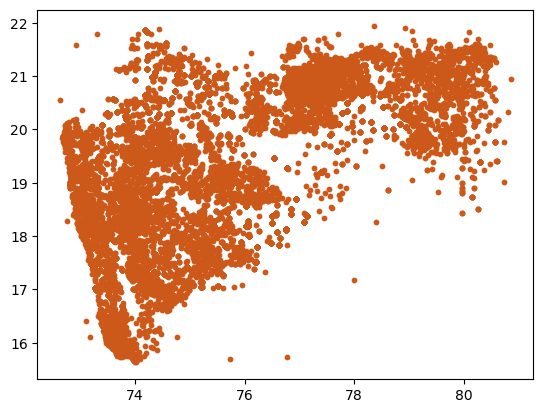

In [43]:
plt.scatter(X, Y, c=(0.8, 0.35, 0.1), s = 10)
plt.show()

Insights:

1. We can clearly see geographical features such as:

    1.1. The Wester Ghats (Straight vertical line on the left)
    
    1.2. The northern part of the Central Deccan Plateau (Clearing in the southeast region)
    
    Due to the sparsity of pincodes in that given area.
    
2. We can also see horizontal linear clearances in the plot which are near the areas where actual rivers run in the state.

3. The pincodes that are off the western shoreline in the ocean denote off-shore islands and forts.

In [44]:
dfm.head()

CircleName         RegionName         DivisionName      OfficeName  \
0  Maharashtra Circle      Nagpur Region   Amaravati Division    Bhatkuli S.O   
1  Maharashtra Circle      Nagpur Region  Chandrapur Division       Subai B.O   
2  Maharashtra Circle      Nagpur Region  Chandrapur Division  Tembhuwahi B.O   
3  Maharashtra Circle      Nagpur Region  Chandrapur Division   Vihirgaon B.O   
4  Maharashtra Circle  Aurangabad Region   Osmanabad Division    Nilegaon B.O   

   Pincode OfficeType      Delivery    District    StateName   Latitude  \
0   444602         PO  Non Delivery    AMRAVATI  MAHARASHTRA  20.907000   
1   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA  19.573344   
2   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA  19.692433   
3   442905         BO      Delivery  CHANDRAPUR  MAHARASHTRA  19.726809   
4   413603         BO      Delivery   OSMANABAD  MAHARASHTRA  18.010041   

   Longitude  
0    77.6026  
1  79.442259  
2  79.357116  
3  79.453512  
4  76.071064

K-Means (Reference: https://www.youtube.com/watch?v=lX-3nGHDhQg)

for K = 36 (No. of Districts in Maharshtra)

In [45]:
features = ['Latitude', 'Longitude']
data = pd.DataFrame((dfm["Longitude"], dfm["Latitude"]))
data = pd.DataFrame.transpose(data)
print(data.shape)
data.head()

(11546, 2)


Longitude   Latitude
0  77.602600  20.907000
1  79.442259  19.573344
2  79.357116  19.692433
3  79.453512  19.726809
4  76.071064  18.010041

In [46]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [47]:
centroids = random_centroids(data, 36)
centroids

C:\Users\tanay\AppData\Local\Temp\ipykernel_1204\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


0          1         2         3          4          5   \
Longitude  75.133296  75.312064  75.13585  74.77320  79.847694  72.827555   
Latitude   17.010000  19.991529  18.10640  17.47389  20.540000  20.197749   

                  6          7      8          9   ...         26         27  \
Longitude  76.499994  73.969034  74.21  73.307950  ...  74.717623  75.061464   
Latitude   16.468214  18.192589  19.08  19.812787  ...  21.386778  17.590361   

                  28         29         30         31         32         33  \
Longitude  76.017708  75.003061  73.849750  76.017708  75.768989  79.913673   
Latitude   19.172028  21.246250  20.404933  19.453676  18.081546  20.841750   

                34         35  
Longitude  75.0291  72.941445  
Latitude   19.2000  21.490000  

[2 rows x 36 columns]

In [48]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis = 1)))
    return distances.idxmin(axis = 1)

In [49]:
labels = get_labels(data, centroids)

In [50]:
labels = pd.DataFrame(labels).T
labels

0      1      2      3      4      5      6      7      8      9      ...  \
0     15     24     24     24     32     32     32     32     32     32  ...   

   12746  12747  12748  12749  12750  12751  12752  12753  12754  12755  
0     24     24      4      4      4     24     24     33      4      0  

[1 rows x 11546 columns]

In [51]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [52]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [53]:
def plot_clusters(data, labels, centroids, iteration):
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data[:, 0], y=data[:, 1], c = labels, s = 10)

    plt.show()

k = The number of districts in Maharshtra

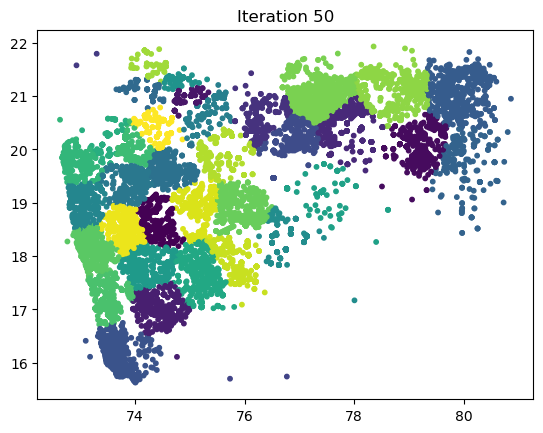

In [54]:
max_iterations = 100
k = 36

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while (iteration < max_iterations and not centroids.equals(old_centroids)):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    labels = np.array(labels)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data.to_numpy(), labels, centroids.to_numpy(), iteration)

    iteration += 1

Insights:

1. The model doesn't seem to accurately predict the distric of Mumbai, possible reasons are: since districs are assigned on population whereas pincodes are assigned roughly on distance and population both, there is a large amount of population in the Mumbai area having a relatively small number of pincodes, thus the distric is predicted bigger than the actual size.

2. The model has trouble predicting districs in the eastern border accurately because of sparsity of data in these regions.

3. The model seems to predict the districts in the western shore and the northern border with a relatively high accuracy since the ratio of distance to population is somewhat constant in these regions, so the pincodes are spread out uniformly.